In [12]:
# dummy_analysis.py

import pandas as pd
from dataguy.core import DataGuy  # adjust import as needed
from pathlib import Path

# 1) Initialize
dg = DataGuy(max_code_history=50)

# 2) Load some toy data
df = pd.DataFrame({
    "age":   [25, 30, None, 45, 50, None],
    "score": [88, 92, 75, None, 85, 90]
})
dg.set_data(df)
print("Original data:\n", dg.data, "\n")



Original data:
     age  score
0  25.0   88.0
1  30.0   92.0
2   NaN   75.0
3  45.0    NaN
4  50.0   85.0
5   NaN   90.0 



In [8]:
# 3) Summarize & describe
summary = dg.summarize_data()
print("Summary:\n", summary, "\n")

description = dg.describe_data()
print("LLM description:\n", description, "\n")




Summary:
 {'shape': (6, 2), 'columns': ['age', 'score'], 'missing_counts': {'age': 2, 'score': 1}, 'means': {'age': 37.5, 'score': 86.0}} 

LLM description:
 This dataset consists of 6 rows and 2 columns: "age" and "score". The age column has 2 missing values while the score column has 1 missing value. The average age in the dataset is 37.5 years, and the average score is 86.0. The dataset appears to be tracking individuals' ages and some type of performance or test score. 



In [9]:
# 4) Wrangle (drop/massage missing values, etc.)
cleaned = dg.wrangle_data()
print("Cleaned data:\n", cleaned, "\n")

# 5) Analyze via LLM
analysis = dg.analyze_data()
print("LLM analysis dict:\n", analysis, "\n")



wrangler = lambda df: (
    df
    .copy()
    .assign(
        age=lambda x: x['age'].fillna(x['age'].mean()),
        score=lambda x: x['score'].fillna(x['score'].mean())
    )
)
Cleaned data:
     age  score
0  25.0   88.0
1  30.0   92.0
2  37.5   75.0
3  45.0   86.0
4  50.0   85.0
5  37.5   90.0 

result = {
    'shape': data.shape,
    'columns': list(data.columns),
    'missing_counts': data.isnull().sum().to_dict(),
    'descriptive_stats': data.describe().to_dict(),
    'means': {
        'age': data['age'].mean(),
        'score': data['score'].mean()
    }
}
LLM analysis dict:
 {'shape': (6, 2), 'columns': ['age', 'score'], 'missing_counts': {'age': 0, 'score': 0}, 'descriptive_stats': {'age': {'count': 6.0, 'mean': 37.5, 'std': 9.219544457292887, 'min': 25.0, '25%': 31.875, '50%': 37.5, '75%': 43.125, 'max': 50.0}, 'score': {'count': 6.0, 'mean': 86.0, 'std': 5.966573556070519, 'min': 75.0, '25%': 85.25, '50%': 87.0, '75%': 89.5, 'max': 92.0}}, 'means': {'age': np.float64(37

plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['score'], 
            color='blue', 
            alpha=0.7, 
            edgecolors='black', 
            linewidth=1)

plt.title('Age vs Score Scatter Plot', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


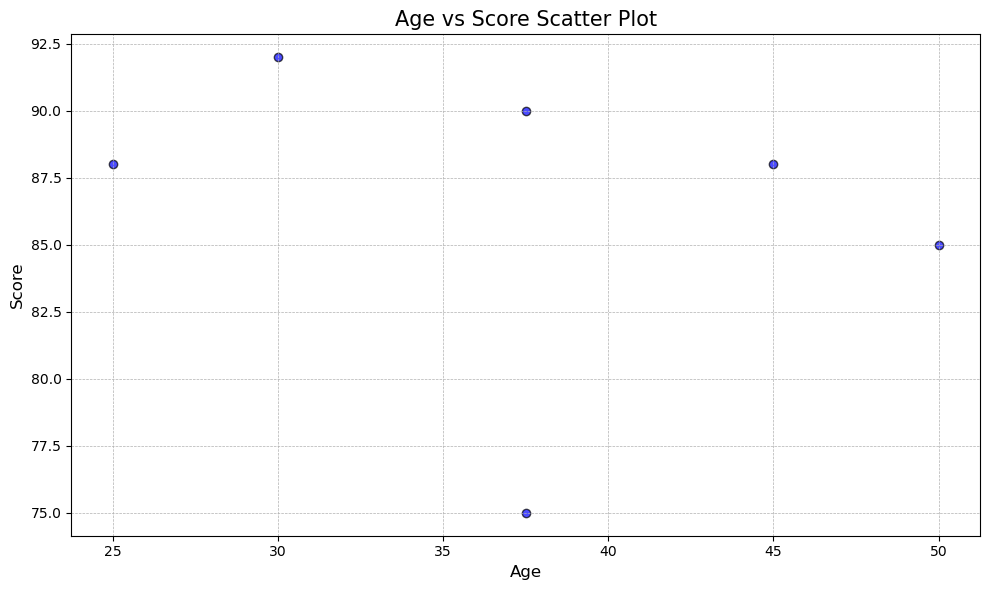

In [4]:
# 6) Scatter-plot via LLM (this will pop up a plt window)
dg.plot_data("age", "score")



In [11]:
data_to_plot=cleaned
data_to_plot

,age,score
0,25.0,88.0
1,30.0,92.0
2,37.5,75.0
3,45.0,86.0
4,50.0,85.0
5,37.5,90.0


Plot described as:
 This scatter plot shows the relationship between sepal length and petal length for three different species of flowers: setosa, versicolor, and virginica.

The x-axis represents the sepal length measured in centimeters, ranging from approximately 5 to 8 cm. The y-axis represents the petal length, also in centimeters, ranging from about 1 to 7 cm.

Each data point represents an individual flower, with the color and shape indicating its species. Red dots represent setosa, green dots represent versicolor, and blue dots represent virginica.

The plot reveals distinct clusters for each species. Setosa has the shortest petals and sepals, forming a separate cluster in the bottom left. Versicolor and virginica have longer sepals and petals, with virginica generally having the longest of both, placing it in the upper right region of the plot.

This visualization allows for a clear comparison of the sepal and petal lengths across the three flower species, highlighting the diff

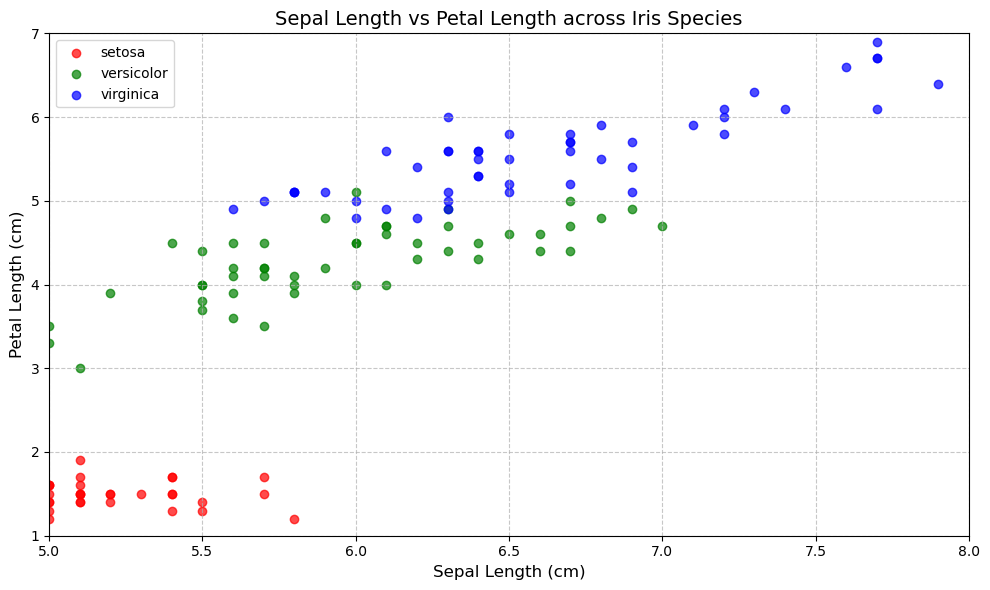

In [13]:
# 7) Describe an existing plot image
#    (Put a plot.png file in your cwd first)
img_bytes = Path("plot.png").read_bytes()
plot_desc = dg.describe_plot(img_bytes)
print("Plot described as:\n", plot_desc, "\n")

# 8) Recreate a similar plot on your cleaned data
dg.recreate_plot(plot_desc)